___
## **Dataset Description**

For this analysis, the **Iris dataset** from **scikit-learn** was used. This dataset includes the following features:

- **Sepal length (cm)**
- **Sepal width (cm)**
- **Petal length (cm)**
- **Petal width (cm)**

The target variable is **species**, which has three classes: **setosa**, **versicolor**, and **virginica**.
___

## **Modular Functions for Data Preprocessing**

To ensure a structured, reusable, and transparent workflow, the following **modular functions** were implemented for preprocessing the Iris dataset. Using functions makes it easier to maintain, test, and reuse the code across different datasets or models:

- `load_iris_data()` – Loads the Iris dataset into Python.
- `check_missing_values()` – Checks for any missing values in the dataset.
- `encode_labels()` – Encodes the class labels into numerical format if required.
- `normalize_features()` – Applies Min-Max scaling to normalize feature values.
- `summary_statistics()` – Computes descriptive statistics (mean, std, min, max) for all features.
- `visualize_pairplot()` – Generates pairplots to visualize feature interactions and class separations.
- `visualize_correlation_heatmap()` – Creates a correlation heatmap to identify relationships between features.
- `visualize_boxplots()` – Draws boxplots to detect potential outliers in the features.
- `cap_outliers_species()` – Applies outlier capping based on species-specific thresholds.
- `split_train_test()` – Splits the dataset into training and testing sets (e.g., 80/20 split).
- `remove_outliers_iqr()` – Removes outliers from the dataset using the IQR method.

These functions make the preprocessing pipeline **modular, readable, and consistent**, which is crucial for reproducibility and efficient analysis.
___

# **Task 1: Data Preprocessing and Exploration**

___
### 1. Load the Dataset

In [53]:
from sklearn.datasets import load_iris
import pandas as pd

def load_iris_data():
    # Load iris dataset from sklearn
    iris = load_iris()
    # Create DataFrame with feature columns
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    # Add species column with categorical labels
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    return df
# Load data and show first few rows
df = load_iris_data()
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### *Explanation:*

Load the Iris dataset from scikit-learn and convert it into a pandas DataFrame. Assign appropriate column names for features and add the species label as a categorical column.
___

### 2. Data Preprocessing

#### a) *Check Missing Values*

In [54]:
def check_missing_values(df):
    # Print count of missing values per column
    print("Missing values per column:")
    print(df.isnull().sum())
    return df

# Run on iris data
check_missing_values(df)

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### *Explanation:*

Check for any missing values in each column of the dataset to ensure data completeness before further processing
The dataset was checked for missing values in all columns. The results show that **there are no missing values** in any of the features or the target variable.This indicates that the dataset is complete and does not require any imputation or handling of missing data before further analysis.
___

#### b) *Normalize Features Using Min-Max Scaling*

In [55]:
from sklearn.preprocessing import MinMaxScaler

def normalize_features(df, feature_cols):
    # Initialize Min-Max scaler
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    # Scale features to range [0,1]
    df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])
    return df_scaled
feature_cols = df.columns[:-1].tolist()  # All except 'species'
df_scaled = normalize_features(df, feature_cols)
df_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


___
## Min-Max Scaling (Normalization)

Min-Max Scaling is a technique used to scale numerical features to a specific range, usually **0 to 1**. This is particularly useful for algorithms that are sensitive to the scale of data.

### Formula
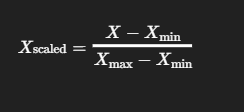


Where:  
- X= original feature value  
- X_min = minimum value of the feature  
- X_max = maximum value of the feature  
- X_scaled = scaled value (between 0 and 1)

### Advantages
- Ensures all features contribute equally to the model.
- Preserves the relationships between the original data points.
- Easy to implement.

### Notes
- Only numeric features should be scaled.
- Scaling the target variable (`species` in classification) is **not needed**.
___

#### c) *Encode Class Labels*

In [56]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(df, label_col='species'):
    # Initialize label encoder
    le = LabelEncoder()
    df_encoded = df.copy()
    # Convert categorical species to numeric labels
    df_encoded[label_col + '_encoded'] = le.fit_transform(df[label_col])
    return df_encoded, le

df_encoded, le = encode_labels(df_scaled)
print(df_encoded.head())
print("Encoded classes:", list(le.classes_))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

  species  species_encoded  
0  setosa                0  
1  setosa                0  
2  setosa                0  
3  setosa                0  
4  setosa                0  
Encoded classes: ['setosa', 'versicolor', 'virginica']


___
#### **Label Encoding was used**

Label Encoding is a technique to convert **categorical labels** into **numeric values**. Many machine learning algorithms require numeric input, so encoding categories is necessary.

### How it Works

1. Each unique category in the feature (or label) is assigned a unique integer.  
2. The integers are arbitrary, but each category maps to a different number.

### Example

For our `species` column with values:


Using Label Encoding:

| Original Species | Encoded Value |
|-----------------|---------------|
| setosa          | 0             |
| versicolor      | 1             |
| virginica       | 2             |


### Advantages
- Simple and easy to implement.
- Converts categorical data to a form suitable for ML models like Decision Trees, KNN, etc.

### Notes
- Label encoding introduces an **ordinal relationship** (0 < 1 < 2), which may not be meaningful for all algorithms.  
- For models sensitive to numeric ordering (like linear regression), **one-hot encoding** may be better.
___



### 3. Data Exploration and Visualization


#### a) *Summary Statistics*

In [57]:
def summary_statistics(df):
    # Display descriptive statistics for numerical columns
    print("Summary statistics:")
    print(df.describe())
summary_statistics(df_encoded)


Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  species_encoded  
count        150.000000       150.000000  
mean           0.458056         1.000000  
std            0.317599         0.819232  
min            0.000000         0.000000  
25%            0.083333         0.000000  
50%            0.500000         1.000000  
75%            0.708333         2.000000  
max            1.000000         2.000000  


___
### **Interpretation:**

### Interpretation of Summary Statistics

The table shows **descriptive statistics** for the normalized Iris dataset features and the encoded `species` column.

#### Features (`sepal length`, `sepal width`, `petal length`, `petal width`)
- **Count**: All features have 150 values, meaning no missing data.  
- **Mean & Median (50%)**: Values are roughly centered between 0 and 1 after Min-Max scaling. For example, the median sepal length is ~0.417, indicating half the flowers have scaled sepal lengths below this.  
- **Standard Deviation (std)**: Shows the spread of values. Petal features (`petal length` and `petal width`) have slightly higher variability (std ~0.3) than sepal features (std ~0.18–0.23).  
- **Min & Max**: After Min-Max normalization, all feature values are scaled between 0 and 1.  
- **Quartiles (25%, 75%)**: Provide insight into the distribution: e.g., 25% of petal lengths are below ~0.10, while 75% are below ~0.69, showing a wide range in petal sizes.

#### Target (`species_encoded`)
- **Count**: 150 samples, no missing values.  
- **Mean**: 1.0, which is the midpoint of the three encoded classes (0, 1, 2).  
- **Std**: 0.82, indicating a roughly balanced class distribution.  
- **Min & Max**: Classes range from 0 to 2.  
- **Quartiles**: 25% of samples are class 0, 50% are class 1, and 75% are class 2, confirming the balanced distribution among species.

**Overall:**  
The normalized features are scaled consistently, and the classes are fairly balanced. This makes the dataset suitable for training machine learning models without further preprocessing.

___

#### b) *Pairplot Visualization*

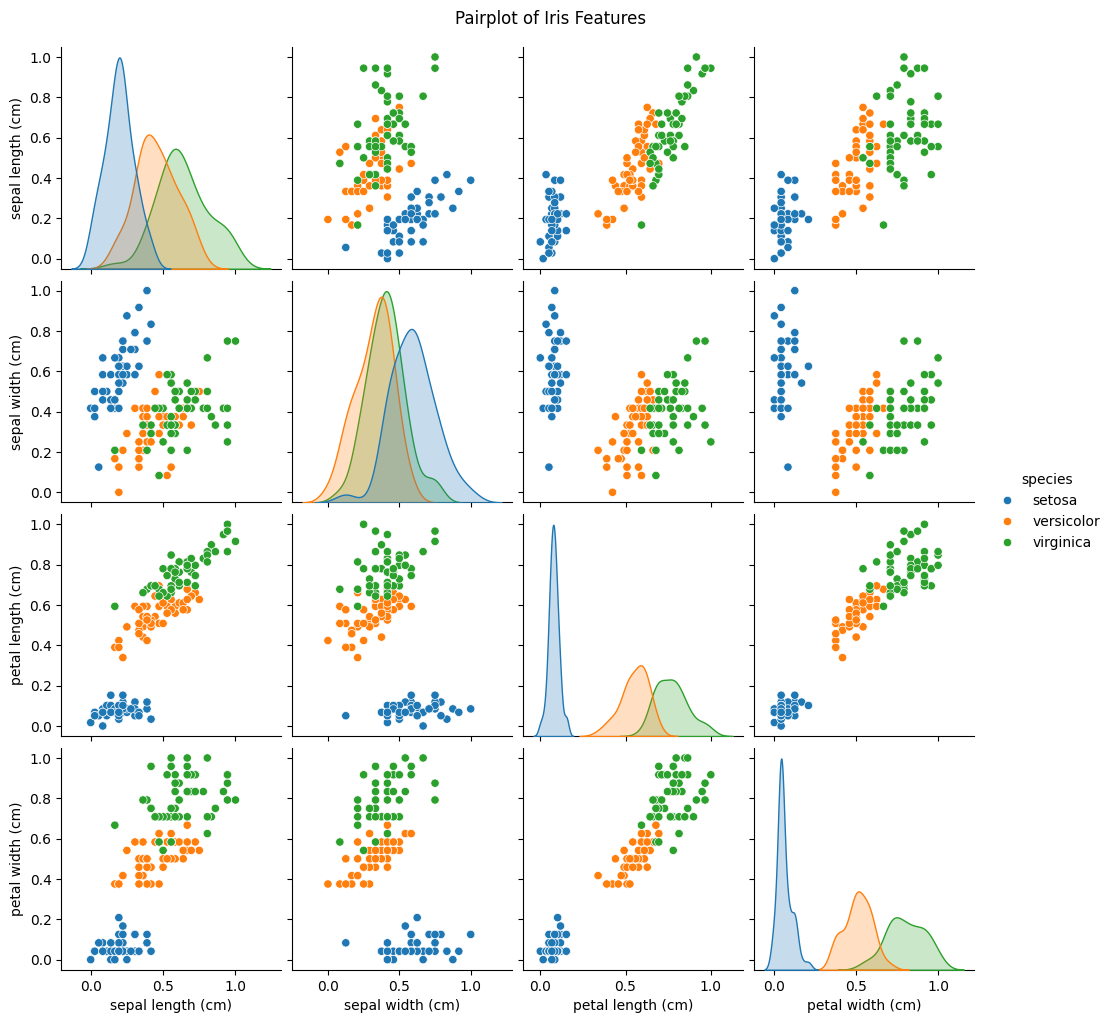

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_pairplot(df, feature_cols, label_col='species'):
    # Plot pairwise relationships colored by species
    sns.pairplot(df, vars=feature_cols, hue=label_col, diag_kind='kde')
    plt.suptitle('Pairplot of Iris Features', y=1.02)
    plt.show()
visualize_pairplot(df_encoded, feature_cols)

___
### **Explanation: Pairplot Interpretation**

**Interpretation:**
- **Diagonals:** Show the distribution of each feature across all flower types.  
  - Example: Sepal length appears almost normally distributed for *versicolor*.  
- **Off-diagonal plots:** Show relationships between pairs of features.  
  - Example: Sepal length and petal length show an almost linear relationship for *versicolor* and *virginica*.  
- Other relationships can be interpreted similarly to identify trends, correlations, or separability among species.

**Purpose:**  
Visualizing pairwise relationships between features, color-coded by species, helps to:
- Detect patterns and clusters.
- Observe separability of species based on feature combinations.
- Identify potential correlations for feature selection or modeling.
___


#### c) *Correlation Heatmap*

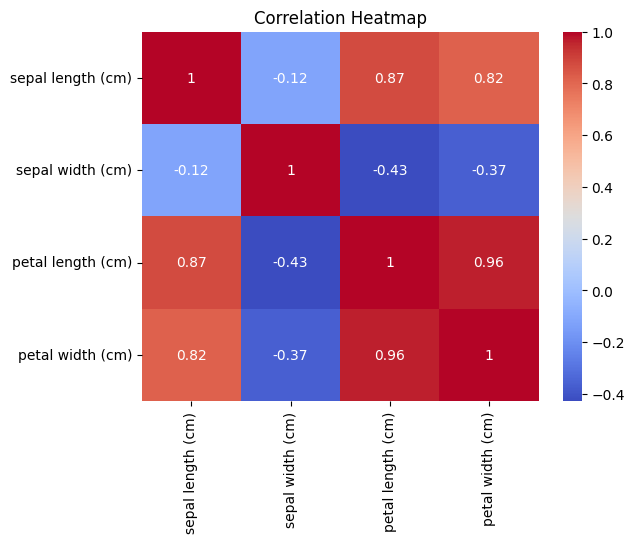

In [59]:
def visualize_correlation_heatmap(df, feature_cols):
    # Compute correlation matrix
    corr = df[feature_cols].corr()
    # Plot heatmap of correlations
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
visualize_correlation_heatmap(df_encoded, feature_cols)


### **Interpretation of Correlation heatmap:**

The correlation heatmap visually represents the correlation matrix, allowing for easy identification of relationships and dependencies among numerical features.

- **Color Intensity:** The color intensity indicates the strength of the correlation. Darker colors represent stronger correlations (positive or negative), while lighter colors indicate weaker correlations.
- **Positive Correlations:** Features that are positively correlated move in the same direction. For example, if `petal length` increases, `petal width` also tends to increase. 
- **Negative Correlations:** Features that are negatively correlated move in opposite directions. For instance, if `sepal length` increases, `sepal width` have -0.12 value of corelation indicates when one increases the other decreases.
- **No Correlation:** A correlation close to 0 suggests no strong linear relationship between the features. As the values get closer to 1 or -1 they indicate strong relationship.
- **Diagonal Values:** The diagonal values are always 1, as they represent the correlation of each feature with itself.
- The values range from -1 to 1.

**Purpose:**  
The heatmap helps to:
- Quickly identify highly correlated features for potential feature selection.
- Detect multicollinearity issues that could affect model performance.
- Gain insights into the relationships between features, guiding further analysis or modeling decisions.

___

#### d) *Boxplots for Outlier Detection*

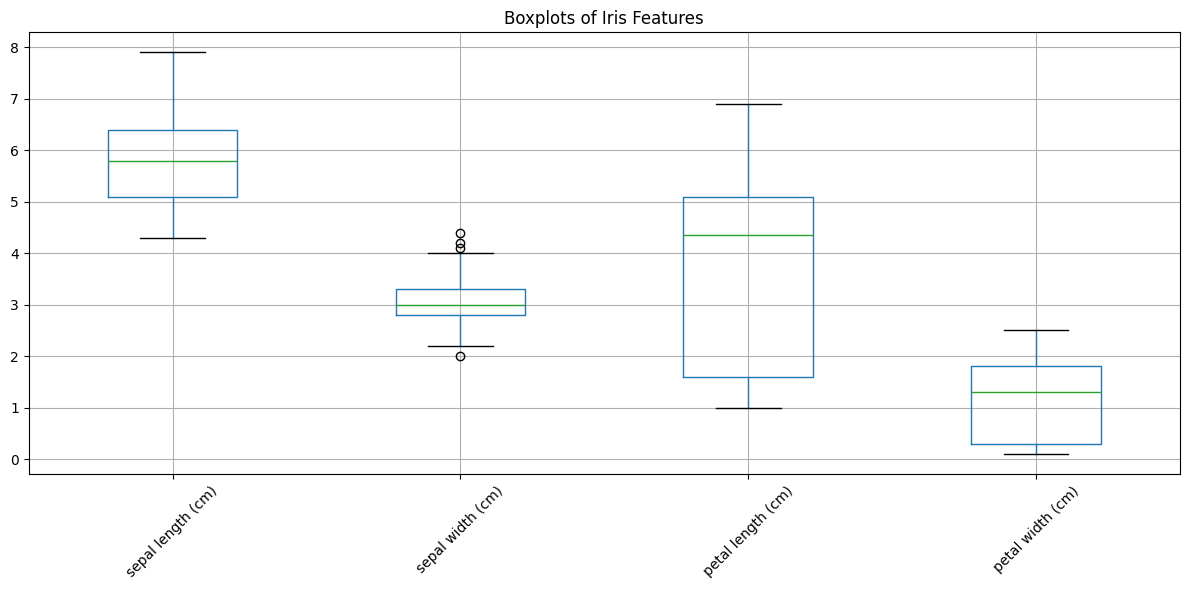

In [60]:
import matplotlib.pyplot as plt

def visualize_boxplots(df, feature_cols, title='Boxplots of Features', save_path=None):
    """
    Create boxplots for the specified numeric features in the dataframe.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - feature_cols: list of numeric column names to plot
    - title: title of the plot (default: 'Boxplots of Features')
    - save_path: path to save the figure (default: None, does not save)
    """
    plt.figure(figsize=(12, 6))
    df[feature_cols].boxplot()
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Example usage
numeric_features = df.columns[:-1]  # all columns except 'species'
visualize_boxplots(df, numeric_features, title='Boxplots of Iris Features', save_path='boxplots_iris.png')


___
## **Explanation: Identifying Outliers with Boxplots**

**Boxplot Interpretation:**
- **Components of a Boxplot:**
  - **Box:** Represents the interquartile range (IQR, 25th to 75th percentile).  
  - **Line inside the box:** Median (50th percentile).  
  - **Whiskers:** Typically extend to 1.5 × IQR above Q3 and below Q1.  
  - **Points beyond whiskers:** Considered **potential outliers**.

**How to identify outliers:**
- Any data point lying **above the upper whisker** or **below the lower whisker** is a potential outlier.  
- In our case there are 4 datapoints identified as outliers in the sepal width.


In [61]:
# Code to remove outliers.
def remove_outliers_iqr(df, feature_cols):
    """
    Remove rows with outliers based on the IQR method for specified numeric features.
    
    Parameters:
    - df: pandas DataFrame
    - feature_cols: list of numeric columns to check for outliers
    
    Returns:
    - df_clean: DataFrame with outliers removed
    """
    df_clean = df.copy()
    
    for col in feature_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Example usage
numeric_features = df.columns[:-1]  # all numeric columns
df_no_outliers = remove_outliers_iqr(df_encoded, numeric_features)
print(f"Original rows: {df.shape[0]}, After removing outliers: {df_no_outliers.shape[0]}")


Original rows: 150, After removing outliers: 146


outliers were removed from the dataset, resulting in a cleaner and more robust dataset for analysis.
___

### 4. Data Splitting Function

In [62]:
from sklearn.model_selection import train_test_split

def split_train_test(df, feature_cols, label_col_encoded='species_encoded', test_size=0.2, random_state=42):
    # Separate features and encoded labels
    X = df[feature_cols]
    y = df[label_col_encoded]
    # Split data into train/test with stratification by class labels
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    # Print sample counts
    print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
    return X_train, X_test, y_train, y_test

feature_cols = df.columns[:-1].tolist()

X_train, X_test, y_train, y_test = split_train_test(df_no_outliers, feature_cols)


Train samples: 116, Test samples: 30


#### *Explanation:*

Split the dataset into training and testing sets with an 80/20 ratio, ensuring stratification by class labels to preserve the original class distribution. This prepares data for supervised learning tasks.
___

#### *Export Preprocessed Data*

In [63]:
# Export preprocessed data to CSV for reuse
df_no_outliers.to_csv('iris_preprocessed.csv', index=False)
